<a href="https://colab.research.google.com/github/Abhinav-Sinha589/BCS_Drowsiness_Detection/blob/main/MAT_TO_MNE/MNE_NB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mne scipy numpy matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 14.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import mne
import matplotlib.pyplot as plt
from scipy.io import loadmat #it stores the .mat data as a dictionary

In [ ]:
data=loadmat('mat2mne.mat',struct_as_record=True)

In [ ]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'mrk', 'cnt', 'nfo'])

In [ ]:
sample_rate= data['nfo']['fs'][0][0][0][0] #data is stored as a multidimensional array
EEG=data['cnt'].T #extracts continuous data. Transposing changes the dimensions of the array so that rows become columns and vice versa.
nchannels,nsamples=EEG.shape #each row coresponds to a EEG channel,each column represents a time point
type(nsamples)

int

In [ ]:
sample_rate

100

Sampling frequency refers to the number of samples taken per second from a continuous signal to make a discrete signal. High sampling frequency ensures detailed information about the signal but results in larger datasets.

In [ ]:
channel_names= [s[0] for s in data['nfo']['clab'][0][0][0]] #we iterate over each element in the nested structure to bring out the actual channel names
channel_names

['AF3',
 'AF4',
 'F5',
 'F3',
 'F1',
 'Fz',
 'F2',
 'F4',
 'F6',
 'FC5',
 'FC3',
 'FC1',
 'FCz',
 'FC2',
 'FC4',
 'FC6',
 'CFC7',
 'CFC5',
 'CFC3',
 'CFC1',
 'CFC2',
 'CFC4',
 'CFC6',
 'CFC8',
 'T7',
 'C5',
 'C3',
 'C1',
 'Cz',
 'C2',
 'C4',
 'C6',
 'T8',
 'CCP7',
 'CCP5',
 'CCP3',
 'CCP1',
 'CCP2',
 'CCP4',
 'CCP6',
 'CCP8',
 'CP5',
 'CP3',
 'CP1',
 'CPz',
 'CP2',
 'CP4',
 'CP6',
 'P5',
 'P3',
 'P1',
 'Pz',
 'P2',
 'P4',
 'P6',
 'PO1',
 'PO2',
 'O1',
 'O2']

data['mrk'] contains event marker information

In [ ]:
event_onsets = data['mrk'][0][0][0] #time points at which events occured during EEG rcording
event_codes=data['mrk'][0][0][1] #event codes provides information about the nature of events.
event_codes

array([[ 1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1,  1,
        -1, -1,  1, -1,  1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1,  1,
         1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
         1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1,
        -1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,
         1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1, -1,
        -1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,
        -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1,
         1, -1, -1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1,
         1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1,
        -1, -1, -1,  1,  1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1,
        -1,  1, -1, -1, -1,  1,  1,  1]], dtype=int16)

In [ ]:
labels=np.zeros((1,nsamples),int)
labels[0,event_onsets]=event_codes #This operation effectively places each event code at its corresponding onset time in the labels array
labels #This array will be used to store event codes at their respective onset times. Initially, all values are set to 0, indicating no event.
#labels array helps to map the events with their timings in continuous EEG data.

array([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
cl_lab=[s[0] for s in data['nfo']['classes'][0][0][0]] #class labels extracted from dataset
cl1=cl_lab[0]
cl2=cl_lab[1]
cl1,cl2

('left', 'foot')

In [ ]:
xpos=data['nfo']['xpos']
ypos=data['nfo']['ypos']

nclasses= len(cl_lab)
nevents= len(event_onsets)#number of events
nchannels=len(channel_names)#number of channels
nchannels,nevents,nclasses

(59, 1, 2)

In [ ]:
print('Number of events:', len(event_onsets))
print('Event codes:',np.unique(event_codes))
print('Number of channels:',nchannels)
print('Number of samples:',nsamples)
print('Class labels:',cl_lab)
print('Number of classes:',nclasses)

Number of events: 1
Event codes: [-1  1]
Number of channels: 59
Number of samples: 190594
Class labels: ['left', 'foot']
Number of classes: 2


In [ ]:
trials={}
win=np.arange(int(0.5*sample_rate), int(2.5*sample_rate)) #it is extracting segments of data 0.5 secs before to 2.5 secs after a certain event
nsamples= len(win)
nsamples

200

Now we are organising EEG data into segments based on different classes

In [ ]:
for cl,code in zip(cl_lab, np.unique(event_codes)): #iterating over class labels and unique event codes
  cl_onsets= event_onsets[event_codes==code] #seleccts only those onsets which belong to the current code.
  trials[cl]= np.zeros((nchannels,nsamples,len(cl_onsets))) #initialises an array with zeros where
  #nchannels- no. of channels, nsamples=no. of samples in each trial, len(cl_onsets)=no of trials for the current class

  for i,onset in enumerate(cl_onsets): #enumerate provides both index and value
    trials[cl][:,:,i]=EEG[:,win+onset] #assigns the extracted EEG data to the i-th(current) trial for the class cl.
    #win+onset shifts the time window by the respective oneset time and get the EEG data during that window.


Outer Loop: Iterates over each class label (cl) and corresponding unique event code (code). It filters event onsets (event_onsets) based on the current event code, prepares trials[cl] to store EEG data for each trial.

Inner Loop: Iterates over each onset (onset) within cl_onsets (filtered onsets for the current class and event code). It extracts EEG data for each trial defined by win shifted by onset and stores it in trials[cl].


In [ ]:
%qtconsole

In [ ]:
left_hand=np.rollaxis(trials[cl1],2,0) #rearranges the dimensions of the array
right_hand=np.rollaxis(trials[cl2],2,0)
left_hand
#now the first dimension represents trials
#left_hand and right_hand will be of shape (ntrials, nchannels, nsamples)

array([[[ 885.,  909.,  918., ...,  916.,  922.,  939.],
        [ 674.,  732.,  708., ...,  636.,  638.,  610.],
        [1312., 1303., 1334., ..., 1207., 1240., 1259.],
        ...,
        [1016.,  987.,  971., ...,  688.,  764.,  770.],
        [1312., 1224., 1188., ...,  898.,  998., 1090.],
        [ 787.,  789.,  794., ...,  458.,  597.,  631.]],

       [[ 799.,  839.,  852., ...,  880.,  903.,  933.],
        [ 279.,  352.,  415., ...,  388.,  436.,  468.],
        [1153., 1175., 1178., ..., 1257., 1279., 1296.],
        ...,
        [ 676.,  697.,  759., ...,  701.,  739.,  821.],
        [ 957.,  964., 1061., ..., 1086., 1122., 1129.],
        [ 478.,  475.,  576., ...,  539.,  588.,  652.]],

       [[ 896.,  885.,  865., ...,  940.,  960., 1008.],
        [ 359.,  355.,  359., ...,  266.,  294.,  313.],
        [1288., 1240., 1197., ..., 1185., 1191., 1236.],
        ...,
        [ 873.,  806.,  681., ...,  694.,  629.,  573.],
        [1211., 1151., 1032., ..., 1061.,  94

In [ ]:
# print(left_hand.shape)
new_data=np.concatenate([left_hand,right_hand])  #concatenates EEG trial data
Y=np.concatenate([-np.ones(left_hand.shape[0]),np.ones(right_hand.shape[0])])  #-1 indicates left hand trials and 1 indicates right hand trials
Y[Y == 0] = -1
print(new_data.shape)
print(Y.shape)
Y

(200, 59, 200)
(200,)


array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

Creating mne data structure

In [ ]:
n_channels=59
info = mne.create_info(ch_names=channel_names,sfreq=sample_rate,ch_types=['eeg']*n_channels)
#info.set_montage('standard_1020')
print('Event created :', info)

Event created : <Info | 7 non-empty values
 bads: []
 ch_names: AF3, AF4, F5, F3, F1, Fz, F2, F4, F6, FC5, FC3, FC1, FCz, FC2, ...
 chs: 59 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 50.0 Hz
 meas_date: unspecified
 nchan: 59
 projs: []
 sfreq: 100.0 Hz
>


In [ ]:
xpos=data['nfo']['xpos'][0][0]
ypos=data['nfo']['ypos'][0][0]
#contains coordinates of the EEG electrodes

In [ ]:
layout_pos=np.concatenate([xpos,ypos],axis=1) #concatenates the arrays along columns
layout_pos

array([[-0.20109028,  0.68656518],
       [ 0.20109028,  0.68656518],
       [-0.48547489,  0.52547424],
       [-0.32894737,  0.46520183],
       [-0.16535231,  0.43208641],
       [ 0.        ,  0.421549  ],
       [ 0.16535231,  0.43208641],
       [ 0.32894737,  0.46520183],
       [ 0.48547489,  0.52547424],
       [-0.60591541,  0.27165704],
       [-0.39919579,  0.23384348],
       [-0.19765935,  0.21394494],
       [ 0.        ,  0.20773757],
       [ 0.19765935,  0.21394494],
       [ 0.39919579,  0.23384348],
       [ 0.60591541,  0.27165704],
       [-0.74834683,  0.15177169],
       [-0.52472976,  0.12553103],
       [-0.30963911,  0.11086096],
       [-0.10226303,  0.10426648],
       [ 0.10226303,  0.10426648],
       [ 0.30963911,  0.11086096],
       [ 0.52472976,  0.12553103],
       [ 0.74834683,  0.15177169],
       [-0.87719298,  0.        ],
       [-0.64569058,  0.        ],
       [-0.421549  ,  0.        ],
       [-0.20773757,  0.        ],
       [ 0.        ,

In [ ]:
layout=mne.channels.generate_2d_layout(
    xy=layout_pos,
    ch_names=channel_names,

    name='EEG CUSTOM LAYOUT',
)
#2d plot of channels across the scalp

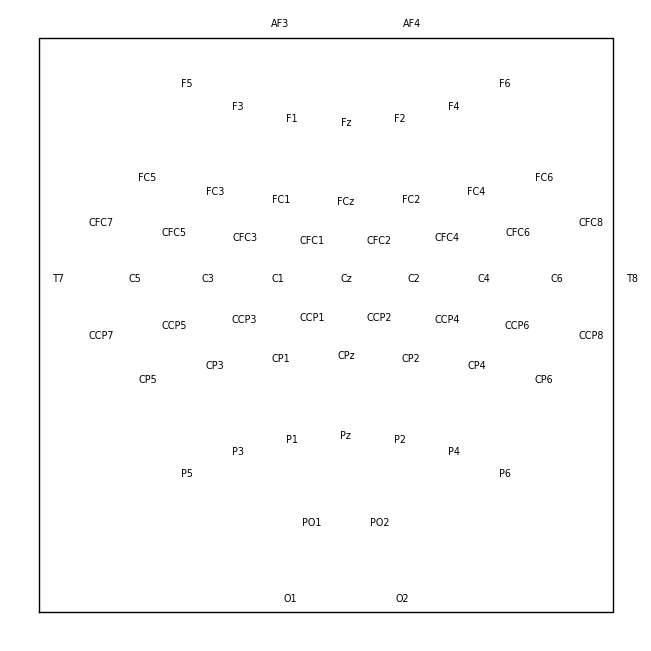

In [ ]:
layout.plot();

In [ ]:
#MNE EVENTS
event_id = dict(left=-1,right=1)
eventlength=Y.shape[0] #number of events
ev=[i*sample_rate*3 for i in range(eventlength)] #creates a list of onset times, spaced 3 secs apart
events=np.column_stack((np.array(ev,dtype=int),
np.zeros(eventlength,dtype=int),
np.array(Y,dtype=int)))
#creating events array, each row represents an event
#The first column: Event onset times in samples.
#The second column: Placeholder zeros (often used for additional event information).
#The third column: Event codes corresponding to the labels in Y
events

array([[    0,     0,    -1],
       [  300,     0,    -1],
       [  600,     0,    -1],
       [  900,     0,    -1],
       [ 1200,     0,    -1],
       [ 1500,     0,    -1],
       [ 1800,     0,    -1],
       [ 2100,     0,    -1],
       [ 2400,     0,    -1],
       [ 2700,     0,    -1],
       [ 3000,     0,    -1],
       [ 3300,     0,    -1],
       [ 3600,     0,    -1],
       [ 3900,     0,    -1],
       [ 4200,     0,    -1],
       [ 4500,     0,    -1],
       [ 4800,     0,    -1],
       [ 5100,     0,    -1],
       [ 5400,     0,    -1],
       [ 5700,     0,    -1],
       [ 6000,     0,    -1],
       [ 6300,     0,    -1],
       [ 6600,     0,    -1],
       [ 6900,     0,    -1],
       [ 7200,     0,    -1],
       [ 7500,     0,    -1],
       [ 7800,     0,    -1],
       [ 8100,     0,    -1],
       [ 8400,     0,    -1],
       [ 8700,     0,    -1],
       [ 9000,     0,    -1],
       [ 9300,     0,    -1],
       [ 9600,     0,    -1],
       [ 9

In [ ]:
tmin=0.5
event_id = dict(left=-1,right=1)
epochs=mne.EpochsArray(new_data,info,events,tmin,event_id) #created epochs

Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated


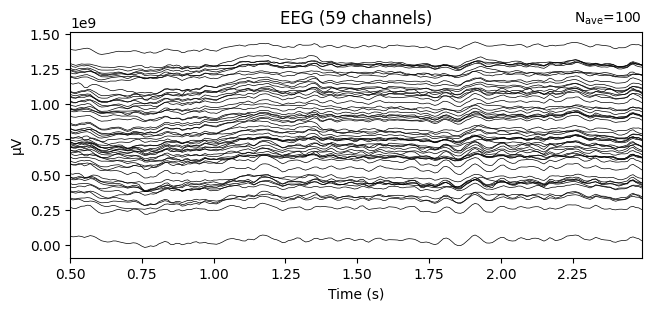

In [ ]:
epochs['left'].average().plot();

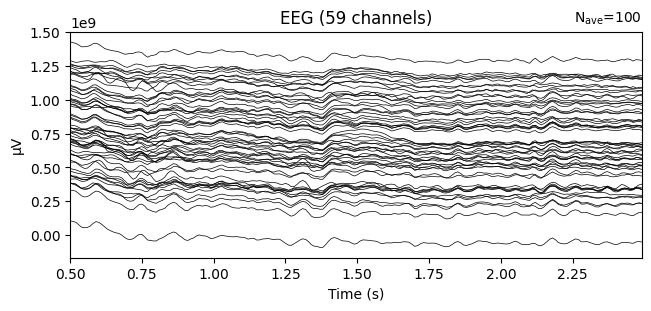

In [ ]:
epochs['right'].average().plot();

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs...


<ipython-input-28-dbdc09158686>:1: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  epochs.plot_psd();
<ipython-input-28-dbdc09158686>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochs.plot_psd();


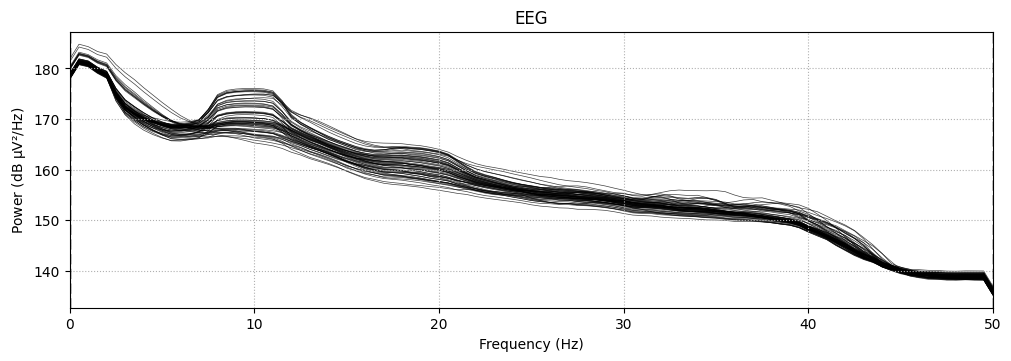

In [ ]:
epochs.plot_psd();

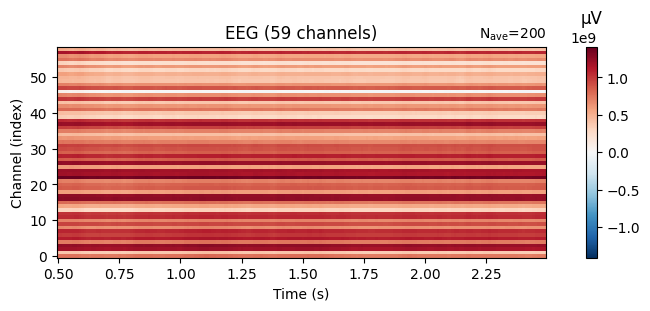

In [ ]:
epochs.average().plot_image();

In [ ]:
epochs.filter(l_freq=8,h_freq=32);

Setting up band-pass filter from 8 - 32 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 32.00 Hz
- Upper transition bandwidth: 8.00 Hz (-6 dB cutoff frequency: 36.00 Hz)
- Filter length: 165 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done 2591 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done 3041 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done 3527 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done 4607 tasks      | elapsed:    4.5s
[Parallel(n_job

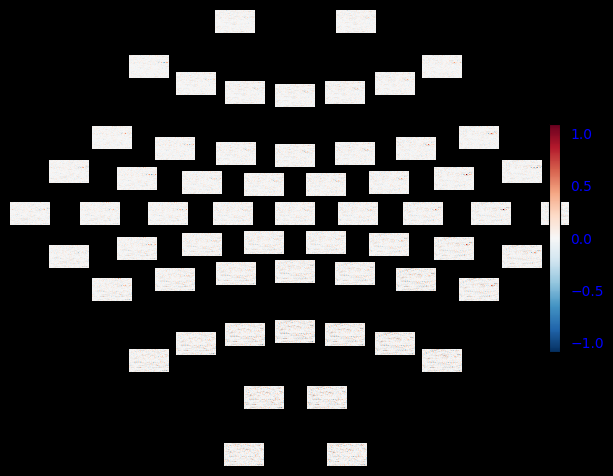

In [ ]:
epochs.plot_topo_image(layout=layout,fig_facecolor='black',font_color='b');

In [ ]:
left=epochs['left'].average()
right=epochs['right'].average()

Yaha se new graphs bnaye maine :)


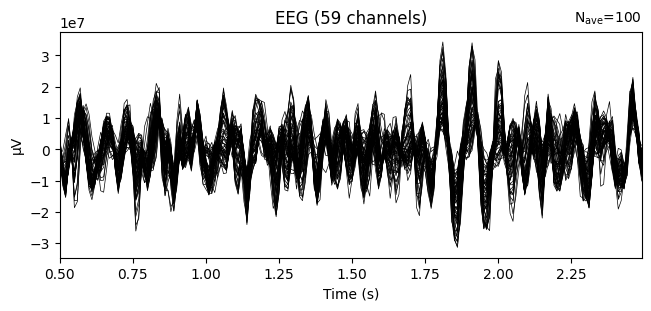

In [ ]:
left.plot();

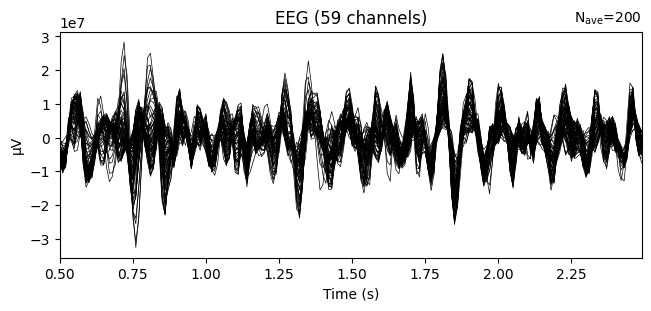

In [ ]:
diff=mne.combine_evoked((left,-right),weights='equal')
diff.plot();

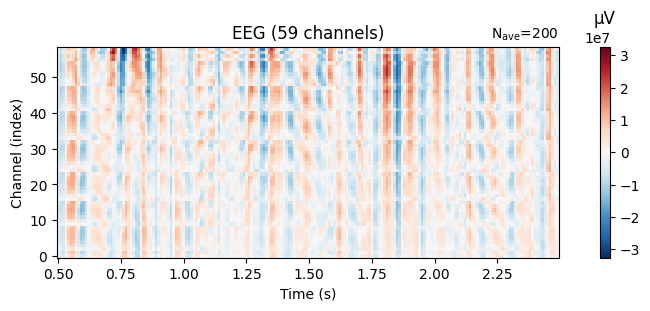

In [ ]:
diff.plot_image();

<ipython-input-45-9b87583a0cc9>:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds({"right": right,"left":left},picks=[13]);


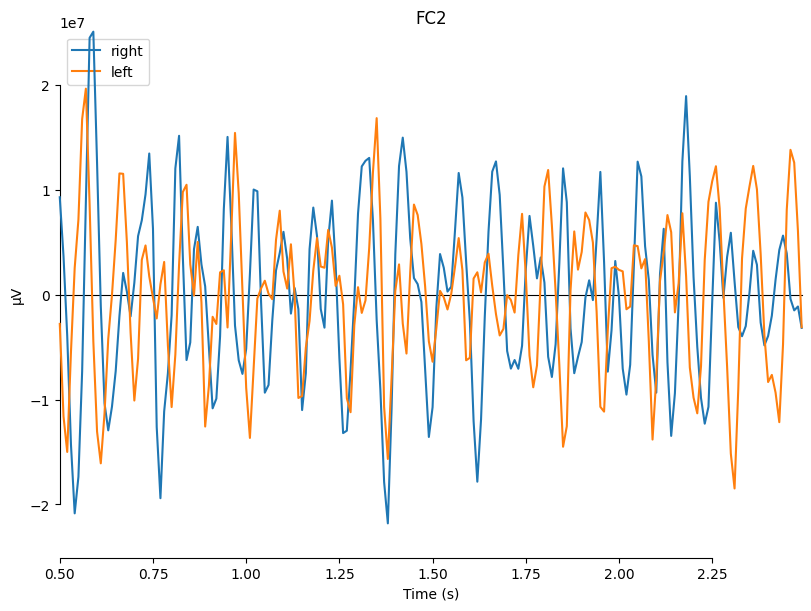

In [ ]:
mne.viz.plot_compare_evokeds({"right": right,"left":left},picks=[13]);